In [ ]:
import pandas as pd
import datetime

In [21]:
df=pd.read_csv('D&D_HistoricalPrices.csv',parse_dates=['Date'])
# index_col='DATE'
# df.drop(['Open','High','Low'],axis=1,inplace=True)

# df= pd.read_excel(r'Logical Ports Prediction.xlsx',sheet_name='C2',header=0)
df['Date']=pd.to_datetime(df['Date'])


In [22]:

df=df.sort_values(by='Date',ascending=True)

In [23]:
df.drop([' Open', ' High', ' Low'],axis=1,inplace=True)
df.reset_index(inplace=True,drop=True)

In [24]:
df

,Date,Close
0,2022-05-18,31490.07
1,2022-05-19,31253.13
2,2022-05-20,31261.90
3,2022-05-23,31880.24
4,2022-05-24,31928.62
...,...,...
63,2022-08-18,33999.04
64,2022-08-19,33706.74
65,2022-08-22,33063.61
66,2022-08-23,32909.59


In [25]:
list(df.columns)

['Date', ' Close']

In [26]:
def MStd(price,days):
    ma=price.rolling(days).std()
    ma.dropna(inplace=True)
    return ma

def MAvg(price,days):
    ma=price.rolling(days).mean()
    ma.dropna(inplace=True)
    return ma

def MMax(price,days):
    ma=price.rolling(days).max()
    ma.dropna(inplace=True)
    return ma

def MMin(price,days):
    ma=price.rolling(days).min()
    ma.dropna(inplace=True)
    return ma

In [27]:
a=MStd(df,30)
a=a.rename({' Close':'D&J_Close30d_Std.'},axis=1)
a

,D&J_Close30d_Std.
29,1060.159036
30,1064.472620
31,1069.177619
32,1072.516129
33,1072.002538
34,1071.027518
35,1068.263188
36,1052.313689
37,1007.538197
38,970.903661


In [28]:
list(a.columns)

['D&J_Close30d_Std.']

In [29]:
b=MAvg(df,30)
b=b.rename({' Close':'D&J_Close30d_Avg.'},axis=1)
b

,D&J_Close30d_Avg.
29,31638.516000
30,31625.422333
31,31615.912000
32,31608.438000
33,31591.915000
34,31572.232667
35,31540.684667
36,31485.489333
37,31404.150333
38,31325.485333


In [30]:
c=MMax(df,30)
c=c.rename({' Close':'D&J_Close30d_Max'},axis=1)
c

,D&J_Close30d_Max
29,33248.28
30,33248.28
31,33248.28
32,33248.28
33,33248.28
34,33248.28
35,33248.28
36,33248.28
37,33248.28
38,33248.28


In [31]:
d=MMin(df,30)
d=d.rename({' Close':'D&J_Close30d_Min'},axis=1)
d

,D&J_Close30d_Min
29,29888.78
30,29888.78
31,29888.78
32,29888.78
33,29888.78
34,29888.78
35,29888.78
36,29888.78
37,29888.78
38,29888.78


In [32]:
df=pd.merge(df,a,how='inner',left_index=True,right_index=True)
df=pd.merge(df,b,how='inner',left_index=True,right_index=True)
df=pd.merge(df,c,how='inner',left_index=True,right_index=True)
df=pd.merge(df,d,how='inner',left_index=True,right_index=True)


In [33]:
df.head()

,Date,Close,D&J_Close30d_Std.,D&J_Close30d_Avg.,D&J_Close30d_Max,D&J_Close30d_Min
29,2022-06-30,30775.43,1060.159036,31638.516000,33248.28,29888.78
30,2022-07-01,31097.26,1064.472620,31625.422333,33248.28,29888.78
31,2022-07-05,30967.82,1069.177619,31615.912000,33248.28,29888.78
32,2022-07-06,31037.68,1072.516129,31608.438000,33248.28,29888.78
33,2022-07-07,31384.55,1072.002538,31591.915000,33248.28,29888.78


<AxesSubplot:>

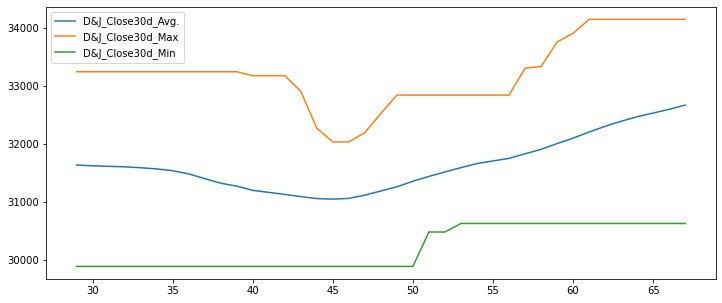

In [34]:
df[['D&J_Close30d_Avg.','D&J_Close30d_Max','D&J_Close30d_Min']].plot(figsize=(12,5))

In [35]:
# Filter the first date of each month 
df=df.resample('M',on='Date').first().dropna().reset_index(drop=True)
df.head()
list(df.columns)

['Date',
 ' Close',
 'D&J_Close30d_Std.',
 'D&J_Close30d_Avg.',
 'D&J_Close30d_Max',
 'D&J_Close30d_Min']

In [36]:
df.drop([' Close'],axis=1,inplace=True)
df

,Date,D&J_Close30d_Std.,D&J_Close30d_Avg.,D&J_Close30d_Max,D&J_Close30d_Min
0,2022-06-30,1060.159036,31638.516000,33248.28,29888.78
1,2022-07-01,1064.472620,31625.422333,33248.28,29888.78
2,2022-08-01,703.221358,31359.168667,32845.13,29888.78


In [38]:
pd.DataFrame.to_csv(df,'D&D_30DMoving_new.csv')